# Preliminary Data Analysis and Data Visualization with SeaBorn and Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('../Data/priceData.csv')
del df['Unnamed: 0']

Skewness: 5.160431
Kurtosis: 60.122519


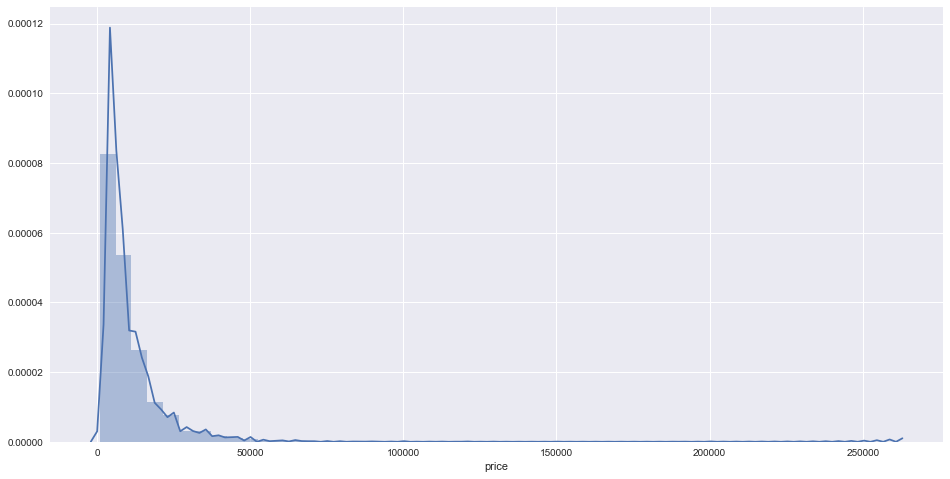

In [2]:
#distribution of the price of the aparmtent, skewedness and kurtosis

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,8

fig, ax = plt.subplots()
fig.figsize=(16,8)
sns.distplot(df['price'], ax=ax)
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

plt.savefig('kurtosis.png')

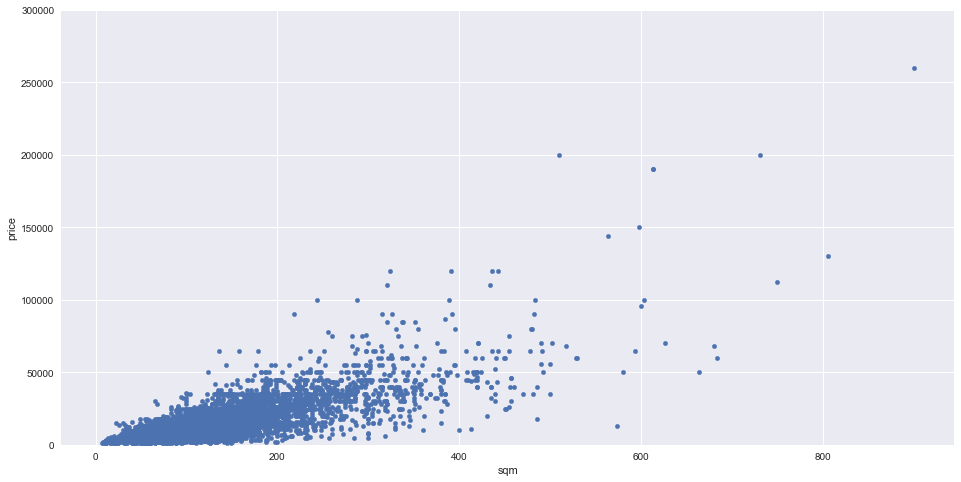

In [3]:
#scatter plot of living area vs. price
var = 'sqm'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,300000), figsize=(16,8));

plt.savefig('priceVsSqm.png')

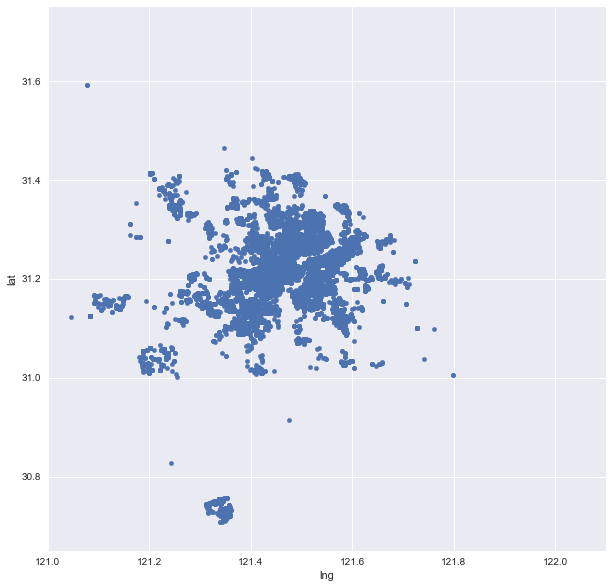

In [4]:
#scatter plot of living area vs. price
var = 'lng'
data = pd.concat([df['lat'], df[var]], axis=1)
data.plot.scatter(x=var, y='lat', xlim=(121,122.1), ylim=(30.65,31.75), figsize=(10,10))
plt.savefig('latlng.png')

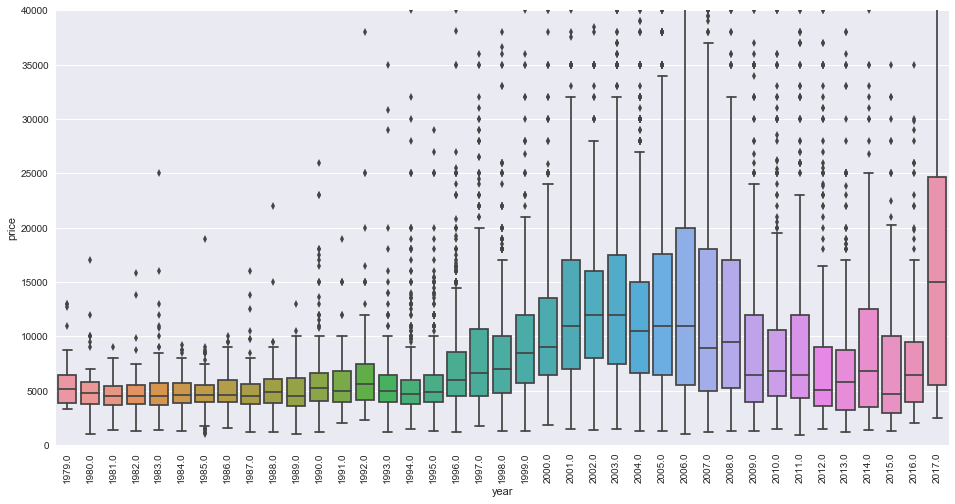

In [5]:
#box plot year built and price
filtered = df.groupby('year').filter(lambda x: len(x) >= 32)

var = 'year'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

plt.savefig('year.png')

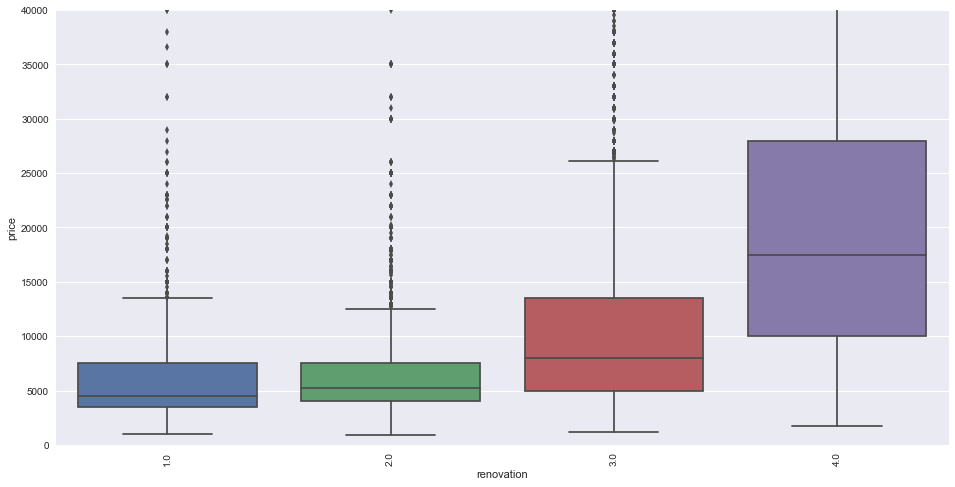

In [6]:
#box plot year built and price

var = 'renovation'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

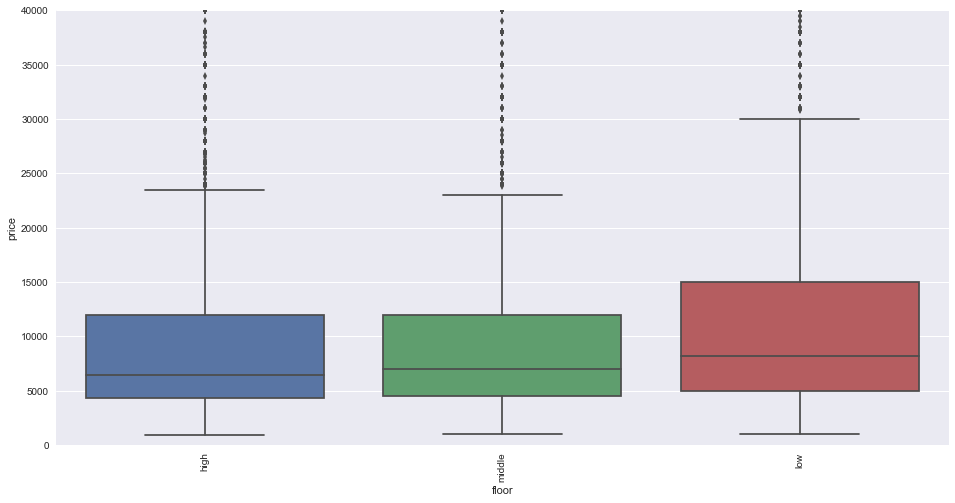

In [7]:
#box plot year built and price

var = 'floor'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

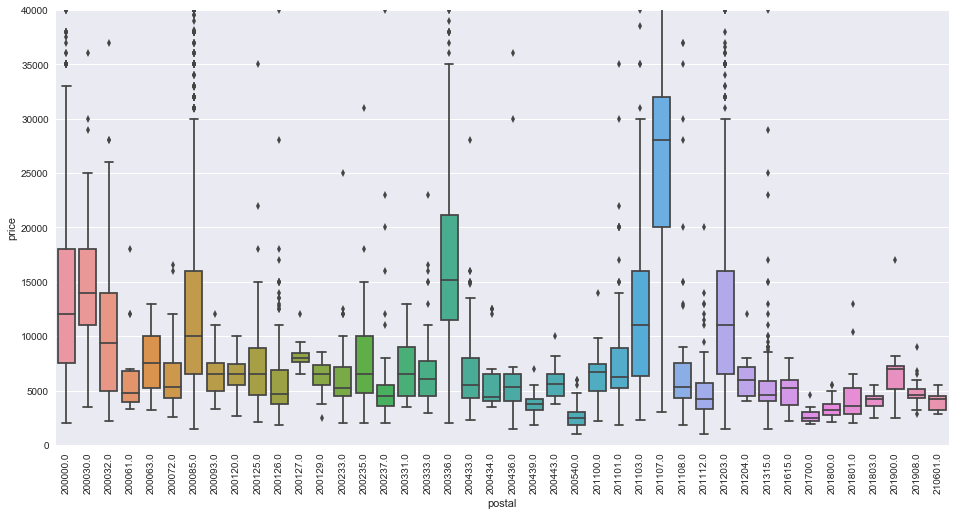

In [8]:
#box plot year built and price
filtered = df.groupby('postal').filter(lambda x: len(x) >= 12)

var = 'postal'
data = pd.concat([filtered['price'], filtered[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=40000);

plt.savefig('postalcode.png')

In [9]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
postal,6807,0.448271
dist_2,1472,0.096938
station_2,1472,0.096938
station_1,1472,0.096938
dist_1,1472,0.096938
room,0,0.000000
listing,0,0.000000
district,0,0.000000
area,0,0.000000
address,0,0.000000


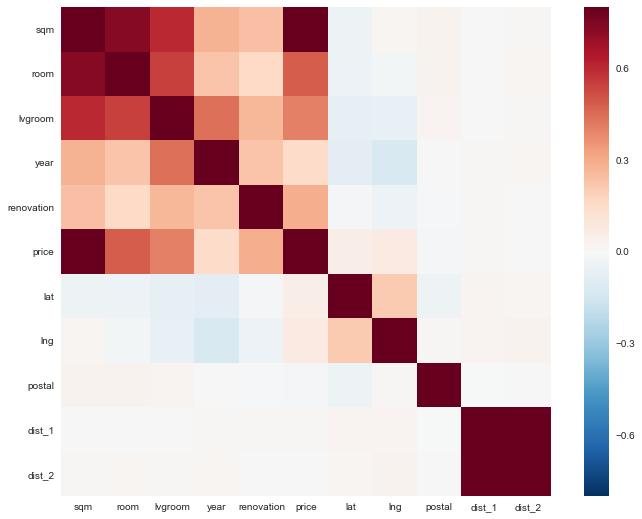

In [10]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.heatmap(corrmat, vmax=.8, square=True);

f.savefig("corrmatrix.png")

In [11]:
df.sort_values(by = 'sqm', ascending = False)[:5]

,id,listing,district,area,address,xiaoqu,sqm,room,lvgroom,year,...,floor,direction,price,lat,lng,postal,station_1,station_2,dist_1,dist_2
14967,shcnz000008725,"兆丰广场,大开间,大平层,繁华地段,配套成熟",长宁,中山公园,长宁路1027号,兆丰广场,900,1,1.0,2002.0,...,middle,S,260000,31.217752,121.417820,200050.0,NaN,NaN,NaN,NaN
3762,shpdz000068710,"御翠园,南北通透,近商圈,房型正气,拎包入住",浦东,联洋,花木路1883弄,御翠园,806,6,3.0,2015.0,...,low,NS,130000,31.214393,121.563503,NaN,延长路,上海马戏城,1400.0,4300.0
15044,shhkz000018266,"宝山路商铺(虹口),一门关,大平层,底楼房,配套成熟",闸北,中兴,宝山路,宝山路商铺(虹口),750,1,1.0,1999.0,...,high,S,112500,31.258144,121.477723,200000.0,NaN,NaN,NaN,NaN
12658,shpdz000059078,"九间堂,主卧朝南,独栋别墅,繁华地段,拎包入住",浦东,联洋,芳甸路599弄,九间堂,731,8,4.0,2006.0,...,high,NS,200000,31.223119,121.561211,201203.0,嘉善路,陕西南路,700.0,1000.0
9078,shqpz000003552,"西郊大公馆,主卧朝南,带采光天井,小区景观位置,带地暖",青浦,徐泾,徐泾东路333弄,西郊大公馆,684,4,2.0,2005.0,...,low,S,60000,31.188286,121.299327,NaN,松江新城,松江大学城,2000.0,3100.0


In [12]:
df.sort_values(by = 'price', ascending = False)[:5]

,id,listing,district,area,address,xiaoqu,sqm,room,lvgroom,year,...,floor,direction,price,lat,lng,postal,station_1,station_2,dist_1,dist_2
14967,shcnz000008725,"兆丰广场,大开间,大平层,繁华地段,配套成熟",长宁,中山公园,长宁路1027号,兆丰广场,900,1,1.0,2002.0,...,middle,S,260000,31.217752,121.417820,200050.0,NaN,NaN,NaN,NaN
9092,shhkz000021415,"新外滩花苑,主卧朝南,大平层,繁华地段,采光充足",虹口,北外滩,东大名路888弄,新外滩花苑,510,6,4.0,2002.0,...,high,W,200000,31.250695,121.504621,200000.0,宝杨路,友谊路,3500.0,4800.0
12658,shpdz000059078,"九间堂,主卧朝南,独栋别墅,繁华地段,拎包入住",浦东,联洋,芳甸路599弄,九间堂,731,8,4.0,2006.0,...,high,NS,200000,31.223119,121.561211,201203.0,嘉善路,陕西南路,700.0,1000.0
14222,shpdz000072973,"上海沃德医疗中心,南北通透,独立电梯,繁华地段,配套成熟",浦东,陆家嘴,"南泉北路399号,世纪大道787号",上海沃德医疗中心,613,6,2.0,2009.0,...,middle,NS,190000,31.233856,121.516760,NaN,NaN,NaN,NaN,NaN
14230,shpdz000073060,"上海沃德医疗中心,南北通透,独立电梯,繁华地段,配套成熟",浦东,陆家嘴,"南泉北路399号,世纪大道787号",上海沃德医疗中心,613,5,2.0,2009.0,...,middle,NS,190000,31.233856,121.516760,NaN,NaN,NaN,NaN,NaN


In [13]:
df.sort_values(by = 'lat', ascending = True)[:50]

,id,listing,district,area,address,xiaoqu,sqm,room,lvgroom,year,...,floor,direction,price,lat,lng,postal,station_1,station_2,dist_1,dist_2
6103,shjsz000001223,"石化十一村,2室1厅,1200元/月",金山,金山,石化十一村,石化十一村,52,2,1.0,1987.0,...,high,E,1200,30.707683,121.340276,200540.0,金科路,张江高科,400.0,2000.0
6102,shjsz000001213,"石化十一村,2室1厅,1500元/月",金山,金山,石化十一村,石化十一村,51,2,1.0,1985.0,...,low,S,1500,30.707683,121.340276,200540.0,陆家浜路,南浦大桥,500.0,1400.0
5989,shjsz000001252,"石化十二村,2室0厅,1600元/月",金山,金山,石化十二村,石化十二村,47,2,0.0,1987.0,...,middle,S,1600,30.708696,121.343840,NaN,御桥,罗山路,5900.0,11600.0
2680,shjsz000002790,"石化十三村,大开间,繁华地段,黄金楼层,小户型",金山,金山,石化十三村,石化十三村,54,2,1.0,1981.0,...,middle,S,1400,30.709688,121.349152,200540.0,打浦桥,嘉善路,500.0,600.0
2725,shjsz000003068,"石化九村,小户型,繁华地段,黄金楼层,近商圈",金山,金山,石化九村,石化九村,50,2,1.0,1980.0,...,high,S,1500,30.711845,121.347260,200540.0,锦江乐园,上海南站,900.0,2700.0
13668,shjsz000000702,"石化九村,南北通透,底楼房,采光充足,繁华地段",金山,金山,石化九村,石化九村,40,1,1.0,1980.0,...,low,NS,1000,30.711845,121.347260,200540.0,顾村公园,宝安公路,3000.0,11000.0
6030,shjsz000001257,"石化八村,1室1厅,1600元/月",金山,金山,石化八村,石化八村,48,1,1.0,1985.0,...,low,S,1600,30.712188,121.346997,200540.0,广兰路,金科路,1100.0,3100.0
13450,shjsz000001719,"石化八村,2室1厅,1500元/月",金山,金山,石化八村,石化八村,55,2,1.0,2015.0,...,high,NS,1500,30.712188,121.346997,200540.0,浦三路,罗山路,8000.0,12800.0
2733,shjsz000003086,"石化八村,主卧朝南,非底楼房,采光充足,非顶楼房",金山,金山,石化八村,石化八村,68,2,1.0,1989.0,...,high,W,1800,30.712188,121.346997,200540.0,锦江乐园,上海南站,2100.0,2700.0
3518,shjsz000002306,"石化六村,位置安静,拎包入住,中式风格,视野好",金山,金山,石化六村,石化六村,40,1,1.0,1976.0,...,middle,E,1300,30.713628,121.345363,200540.0,上海体育馆,上海体育场,400.0,400.0


In [14]:
from scipy import stats

price_z = stats.zscore(df.price)
count = 0

for i in range(len(price_z)):
    if abs(price_z[i]) > 3:
        print(i, price_z[i])
        count += 1
    
print(count)
# df1 = df.where(stats.zscore(df.price) < 3)

204 5.39550937568
226 3.04979908855
630 4.17574002638
640 3.70659796895
991 3.23745591152
1380 4.17574002638
1389 4.6448820838
1640 5.58316619865
1662 3.51894114598
1767 6.05230825608
1771 10.2745867729
1783 3.23745591152
1795 9.33630265806
1797 3.70659796895
1928 6.05230825608
1992 3.42511273449
2042 3.14362750004
2049 3.70659796895
2078 4.92636731826
2352 10.2745867729
2368 5.39550937568
2376 4.6448820838
2456 4.6448820838
3257 3.23745591152
3444 5.11402414123
3599 3.70659796895
3614 3.04979908855
3683 3.04979908855
3740 4.6448820838
3762 11.2128708878
3888 4.17574002638
3976 7.45973442836
3978 4.6448820838
3982 3.70659796895
4071 5.11402414123
4072 3.04979908855
4076 3.70659796895
4134 4.6448820838
4232 4.17574002638
4248 3.14362750004
4255 3.04979908855
4312 3.23745591152
4319 3.23745591152
4374 7.45973442836
4390 3.23745591152
4452 3.70659796895
4483 3.23745591152
4718 3.23745591152
4758 3.23745591152
4824 3.23745591152
4837 3.23745591152
4888 3.70659796895
4995 3.23745591152
5026

In [15]:
sqm_z = stats.zscore(df.sqm)
count = 0

for i in range(len(sqm_z)):
    if abs(sqm_z[i]) > 3:
        print(i, sqm_z[i])
        count += 1
    
print(count)

1 3.63870607496
582 3.57605855305
640 3.09054025818
1354 3.37245410681
1380 3.27848282393
1389 3.26282094345
1640 6.25424011505
1767 3.607382314
1771 5.33018916676
1795 3.41943974825
1869 3.09054025818
2025 3.05921649722
2049 5.03261343765
2345 3.32546846537
2352 3.46642538969
2368 9.04205484041
2376 3.67002983592
2391 3.65436795544
2401 3.88929616264
2417 3.01223085578
2456 3.49774915065
2500 3.13752589962
3235 4.86033275237
3278 3.02789273626
3324 3.67002983592
3328 3.40377786777
3599 4.79768523045
3615 3.27848282393
3740 3.74833923832
3762 11.0154517808
3888 3.85797240168
3919 3.59172043352
3931 3.40377786777
3961 3.40377786777
3974 3.41943974825
3978 6.677110888
4006 3.41943974825
4020 3.16884966058
4032 3.16884966058
4071 4.78202334997
4137 3.65436795544
4231 3.09054025818
4232 3.32546846537
4233 3.57605855305
4255 3.13752589962
4296 4.28084317463
4319 4.93864215477
4324 3.48208727017
4359 4.96996591573
4363 3.16884966058
4374 3.32546846537
4447 4.42180009894
4797 3.6856917164
483

In [16]:
lat_z = stats.zscore(df.lat)
count = 0

for i in range(len(lat_z)):
    if abs(lat_z[i]) > 3:
        print(i, lat_z[i])
        count += 1
    
print(count)

18 -4.60753160578
77 -4.96488650079
182 -4.77427288462
257 -4.67505766583
258 -4.68848053146
260 -4.97813088166
291 3.89016254009
357 -4.64918143136
482 -4.68848053146
485 -4.63562267392
496 3.89016254009
547 -5.01747865941
621 -4.89864431411
626 -4.83582984622
732 -4.89596704264
1124 -4.68848053146
1137 -4.65161835688
1139 -4.85146754552
1140 -4.64918143136
1146 -4.94797101283
1147 -4.68848053146
1150 -4.60753160578
1153 -4.84548120707
2665 -4.77427288462
2670 -4.77427288462
2672 -4.60753160578
2673 -4.68848053146
2674 -4.86289564108
2676 -4.80977715522
2677 -4.59952311607
2680 -5.05743490796
2682 -4.89864431411
2683 -4.8672675037
2684 -4.70409592017
2685 -4.64180068068
2686 -4.77427288462
2688 -4.89596704264
2690 -4.95451207382
2699 -4.80751567212
2700 -4.60753160578
2703 -4.60753160578
2725 -5.03556038306
2728 -4.80751567212
2729 -4.63562267392
2731 -4.6516254557
2733 -5.03208195837
2734 -4.83247311569
2735 -4.60749104106
2736 -4.80940497392
2738 -4.90455662196
2740 -3.85611074476
2